In [14]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import time
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.decomposition import PCA

In [6]:
# Create sample data
X,y = make_classification(n_samples = 1000, n_features = 20,
                          n_informative = 2, n_redundant = 10,
                          n_classes = 2,
                          random_state=30)

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (1000, 20)
y shape: (1000,)


In [35]:
print(f"Percentage 1's: {(sum(y)/len(y)) *100}%")

Percentage 1's: 49.7%


Nice and balanced.

Our sample dataset has 20 features, let's use Principle Component Analysis (PCA) to reduce the dimensionality to help us visualize the data.

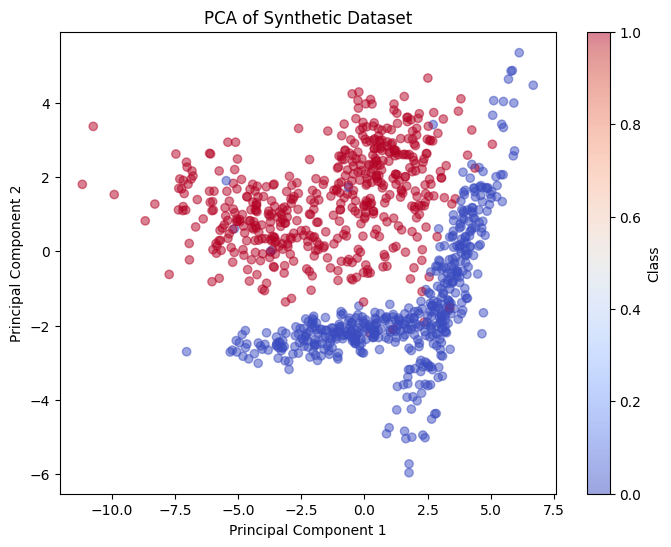

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', alpha=0.5)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA of Synthetic Dataset")
plt.colorbar(label="Class")
plt.show()

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =.2, random_state = 30)

### Run 1

In [44]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation = 'relu', input_shape = (X_train.shape[1],)),
    tf.keras.layers.Dense(8, activation = 'relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

start_time = time.time()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose = 0)

loss, accuracy = model.evaluate(X_test, y_test)

end_time = time.time()

print(f"Total time: {end_time - start_time:.2f} second.")
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

7/7 [==============================] - 0s 2ms/step - loss: 0.2481 - accuracy: 0.9100
Evaluation time: 1.27 second.
Test Loss: 0.24814066290855408
Test Accuracy: 0.9100000262260437


In [ ]:
### Run 2

In [49]:


model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation = 'relu', input_shape = (X_train.shape[1],)),
    tf.keras.layers.Dense(16, activation = 'relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
start_time = time.time()

history = model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose = 0)

loss, accuracy = model.evaluate(X_test, y_test)

end_time = time.time()

print(f"Total time: {end_time - start_time:.2f} second.")
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)



7/7 [==============================] - 0s 2ms/step - loss: 0.2442 - accuracy: 0.9150
Total time: 1.24 second.
Test Loss: 0.24420896172523499
Test Accuracy: 0.9150000214576721


Increasing the number of neurons does not seem to help.

### Run 3

In [61]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation = 'relu', input_shape = (X_train.shape[1],)),
    tf.keras.layers.Dense(8, activation = 'relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

start_time = time.time()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

history = model.fit(X_train, y_train, epochs=20, batch_size=5, validation_split=0.2, verbose = 0)

loss, accuracy = model.evaluate(X_test, y_test)

end_time = time.time()

print(f"Total time: {end_time - start_time:.2f} second.")
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

7/7 [==============================] - 0s 2ms/step - loss: 0.2461 - accuracy: 0.9250
Total time: 3.55 second.
Test Loss: 0.24605873227119446
Test Accuracy: 0.925000011920929


Decreasing batch size does though!

### Run 4

In [63]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation = 'relu', input_shape = (X_train.shape[1],)),
    tf.keras.layers.Dense(8, activation = 'relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

start_time = time.time()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

history = model.fit(X_train, y_train, epochs=25, batch_size=5, validation_split=0.2, verbose = 0)

loss, accuracy = model.evaluate(X_test, y_test)

end_time = time.time()

print(f"Total time: {end_time - start_time:.2f} second.")
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

7/7 [==============================] - 0s 1ms/step - loss: 0.2291 - accuracy: 0.9400
Total time: 4.68 second.
Test Loss: 0.22910381853580475
Test Accuracy: 0.9399999976158142


Good enough.

## We'll try the same with an unbalanced dataset.

In [5]:

# Create an imbalanced dataset with 90% of class 0 and 10% of class 1
X, y = make_classification(n_samples=1000,
                           n_features=20,
                           n_informative=2,
                           n_redundant=10,
                           n_clusters_per_class=1,
                           weights=[0.9, 0.1],
                           random_state=30)

print(f"Percentage 1's: {(sum(y)/len(y)) *100:.2f}%")


Percentage 1's: 10.00%


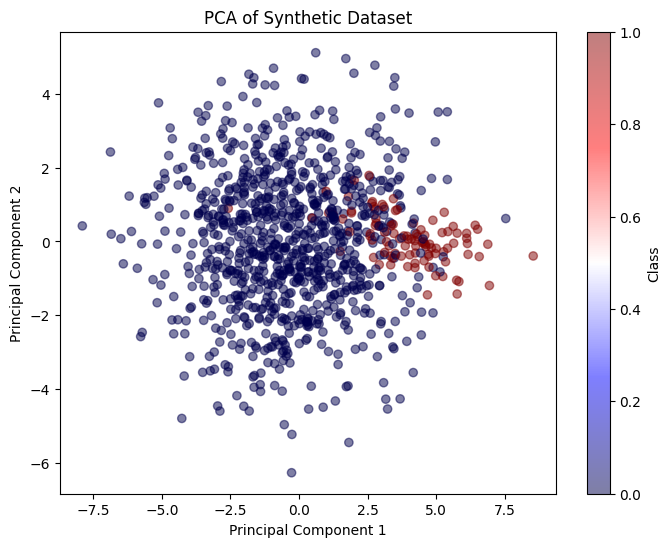

In [6]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='seismic', alpha=0.5)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA of Synthetic Dataset")
plt.colorbar(label="Class")
plt.show()

In [7]:

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =.2, random_state = 30)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation = 'relu', input_shape = (X_train.shape[1],)),
    tf.keras.layers.Dense(8, activation = 'relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

start_time = time.time()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose = 0)

loss, accuracy = model.evaluate(X_test, y_test)

end_time = time.time()

print(f"Total time: {end_time - start_time:.2f} second.")
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

7/7 [==============================] - 0s 1ms/step - loss: 0.1783 - accuracy: 0.9300
Total time: 2.12 second.
Test Loss: 0.17829430103302002
Test Accuracy: 0.9300000071525574


Wow, loss decreased and accuracy decreased! Or did they? Because there are many more 0's than 1's, the model could very confidentally predict 0 for this dataset.

Let's evaluate with a balanced dataset instead! We'll just use make_classification with 200 samples.

In [9]:
X_balanced_test, y_balanced_test = make_classification(n_samples=1000,
                           n_features=20,
                           n_informative=2,
                           n_redundant=10,
                           n_clusters_per_class=1,
                           random_state=30)

print(f"Percentage 1's: {(sum(y_balanced_test)/len(y_balanced_test)) *100:.2f}%")

Percentage 1's: 49.80%


In [17]:
# Not retraining.
loss, accuracy = model.evaluate(X_balanced_test, y_balanced_test)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

32/32 [==============================] - 0s 907us/step
Test Loss: 0.6237605214118958
Test Accuracy: 0.6779999732971191


Thought so! Remember our test set was taken from the same unbalanced data set. We would expect good results because the model was trained on an imbalanced dataset, but we can see that this model is still flawed because it does not generalize well. Let's build a confusion matrix. We would expect the model to predict 0 when the ground truth is actually 1 because 0 was the overrepresented class.

32/32 [==============================] - 0s 954us/step


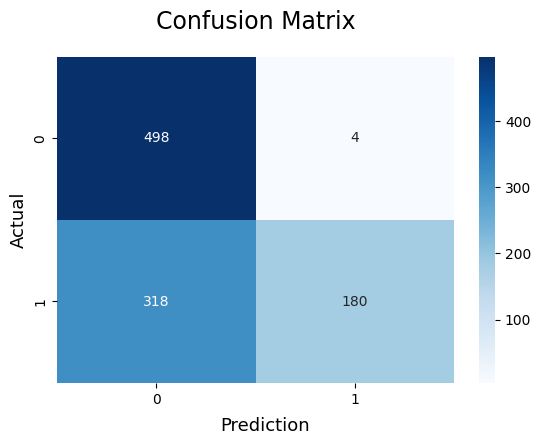

              precision    recall  f1-score   support

           0       0.61      0.99      0.76       502
           1       0.98      0.36      0.53       498

    accuracy                           0.68      1000
   macro avg       0.79      0.68      0.64      1000
weighted avg       0.79      0.68      0.64      1000



In [28]:
y_pred_prob = model.predict(X_balanced_test)
y_pred = (y_pred_prob >=.5).astype(int)



classes = [0,1]

cm = confusion_matrix(y_balanced_test, y_pred)
    
sns.heatmap(cm, annot=True,fmt='g', xticklabels=classes, yticklabels= classes, cmap = plt.cm.Blues)
plt.ylabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('bottom') 
plt.gca().xaxis.tick_bottom()
plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.45, 0.1, 'Prediction', ha='center', fontsize=13)
plt.show()
print(classification_report(y_pred=y_pred, y_true =y_balanced_test, labels=classes, zero_division=0))

As we can see, the model overly predicts the dominant class, 0, reflected in the low precision score. The high recall shows us it very rarely predicts 1 when the actual class is 0

On the other hand for class one, in the instances it predicts 1, it is accurate. It has very very poor recall because the model overly weights class 0.

Our F1 score for both classes is not great. Taking all of the above into account, this is not a great model.

### Example with Weighted Binary Cross Entropy

Lets perform the same test using a *weighted* binary cross entropy.<br>
We'll use inverse class frequency.<br>
$$
\text{weight}_i = \frac{N}{K \times N_i}
$$

where:
- **N** is the total number of samples in the dataset.
- **K** is the total number of classes.
- **N_i** is the number of samples belonging to class \(i\).

In [39]:
ones = sum(y_train)
samples = len(y_train)
print(f"There are {ones} ones out of {samples} samples.")

weight_0 = samples/(2 * (samples - ones))
weight_1 = samples/(2 * ones)

print("weight_0: ", weight_0)
print("weight_1: ", weight_1)

class_weights = {0: weight_0, 1: weight_1}

There are 76 ones out of 800 samples.
weight_0:  0.5524861878453039
weight_1:  5.2631578947368425


In [40]:
# We'll just use the same X, y vectors as before.
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation = 'relu', input_shape = (X_train.shape[1],)),
    tf.keras.layers.Dense(8, activation = 'relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

start_time = time.time()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=32,
                    validation_split=0.2,
                    class_weight=class_weights,
                    verbose=0)

loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

7/7 [==============================] - 0s 2ms/step - loss: 0.2463 - accuracy: 0.8850
Test Loss: 0.24633069336414337
Test Accuracy: 0.8849999904632568


We've already shown above that this may be still be a poor model. Now the real test!

In [41]:
loss, accuracy = model.evaluate(X_balanced_test, y_balanced_test)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

32/32 [==============================] - 0s 2ms/step - loss: 0.3241 - accuracy: 0.8640
Test Loss: 0.3240913450717926
Test Accuracy: 0.8640000224113464


Much better! We'll check the confusion matrix too.

32/32 [==============================] - 0s 958us/step


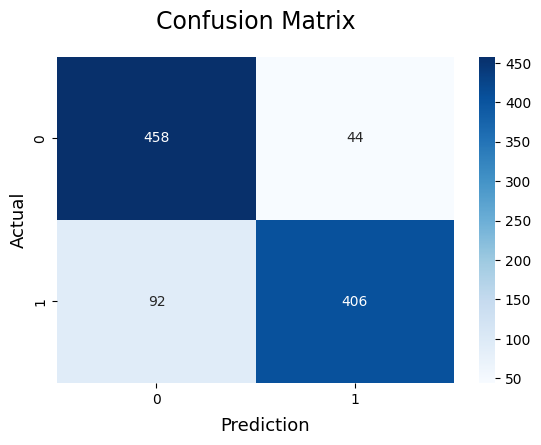

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       502
           1       0.90      0.82      0.86       498

    accuracy                           0.86      1000
   macro avg       0.87      0.86      0.86      1000
weighted avg       0.87      0.86      0.86      1000



In [42]:
y_pred_prob = model.predict(X_balanced_test)
y_pred = (y_pred_prob >=.5).astype(int)




cm = confusion_matrix(y_balanced_test, y_pred)
    
sns.heatmap(cm, annot=True,fmt='g', xticklabels=classes, yticklabels= classes, cmap = plt.cm.Blues)
plt.ylabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('bottom') 
plt.gca().xaxis.tick_bottom()
plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.45, 0.1, 'Prediction', ha='center', fontsize=13)
plt.show()
print(classification_report(y_pred=y_pred, y_true =y_balanced_test, labels=classes, zero_division=0))

This is a much better model than our previous one. The differences between precision and recall are not as stark and we see a much better f1-score for both classes.